<h1 align="center">Logistic Regression</h1> 

В области машинного обучения одним из самых популярных методов бинарной классификации (предсказываем один из двух классов для каждого объекта) является логистическая регрессия, лог регрессия настраивается с помощью метода максимального правдоподобия, который приводит к следующей задаче оптимизации:

$$ L(w, X, y) = \sum_{i = 0}^{N} log (1 + exp(-y_ix_i^Tw)) + \frac{1}{2} ||w||^2-> \min_w$$
$$X \in R^{N \times M}, x \in R^{M}, w \in R^{M}, y \in \{-1, 1\}^N$$

когда мы решили задачу оптимизации (нашли $w$), мы принимаем решение о том, к какому классу относится объект по правилу $y(x) = sign(x^Tw)$. В данной части вам необходимо применить методы линейной алгебры для решения этой задачи. 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами, если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Чем лог-регрессия отличается от svm?

<Ответ>

**Вопрос 2**: Почему считается что регуляризатор мешает переобучаться? Что такое переобучение?

<Ответ>

**Вопрос 3**: Почему лог-регрессия это классификатор?

<Ответ>

### Лог-регрессия своими руками

In [780]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline

In [820]:
# Для тестирования правильности вычисления сгенерируем аргументы, небольшого размера
w, X, y = np.random.random(4), np.random.random((5, 4)), 2*(np.random.randint(0, 2, 5)-0.5)
w = np.array([1,2,-3])
X = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
y = np.array([1,-1,1,1])

### Шаг 1

Запрограммируйте вычисление функции L, используйте только матричные операции (внутри не должно быть циклов -- циклы спрятанны в матричные умножения).

**Замечание**: Нигде в промежуточных вычислениях не стоит вычислять значение $exp(−y_ix^Tw)$, иначе может произойти переполнение. Вместо этого следует напрямую вычислять необходимые величины с помощью специализированных для этого функций: `np.logaddexp` для `ln(1 + exp(·))` и `sp.special.expit` для `1/(1 + exp(·))`.

In [821]:
def logistic_stupid(w, X, y):
    """
        logistic(w, X, y) вычисляет функцию качества лог регрессии L(w, X, y)
        
        w: np.array размера (M,)
        X: np.array размера (N, M)
        y: np.array размера (N,)
        
        funcw: np.float 
    """
    funcw = 0 # Вычислите функцию L
    
    n = X.shape[0]
    for i in range(n):
        funcw += np.logaddexp(0., -y[i] * np.dot(X[i], w.T))
    
    funcw += np.dot(w, w.T) / 2.
    return funcw

In [822]:
def logistic(w, X, y):
    """
        logistic(w, X, y) вычисляет функцию качества лог регрессии L(w, X, y)
        
        w: np.array размера (M,)
        X: np.array размера (N, M)
        y: np.array размера (N,)
        
        funcw: np.float 
    """
    funcw = 0 # Вычислите функцию L
    
    
    funcw = np.logaddexp(0., np.dot(np.multiply(np.matrix(-y).T, np.matrix(X)), w.T)).sum() + np.dot(w, w.T) / 2.
    return funcw

In [823]:
logistic_stupid(w, X, y)

19.072599711671238

In [824]:
logistic(w, X, y)

19.072599711671238

In [49]:
isinstance(logistic(w, X, y), float) # Результат число, этож функция потерь.

True

### Шаг 2

Найдите градиент функции $\nabla_w L(w, X, y)$, запишите в терминах матричных операций, эффективно запрограммируйте вычисленный градиент.

In [785]:
def logistic_grad_stupid(w, X, y):
    """
        logistic_grad(w, X, y) вычисляет градиент функции качества лог регрессии dL(w, X, y)/dw
        
        w: np.array размера (M,)
        X: np.array размера (N, M)
        y: np.array размера (N,)
        
        gradw: np.array размера (M,)
    """
    gradw = np.zeros_like(w) # Вычислите градиент функции dL/dw
    n = X.shape[0]
    for i in range(n):
        gradw += -y[i] * special.expit(-y[i] * np.dot(X[i], w.T)) * X[i]
    gradw += w
#     tmp = -np.sum(special.expit(np.dot(y, np.dot(X, w.T))) * np.multiply(np.matrix(y).T, np.matrix(X)), axis=0)
#     print np.squeeze(np.asarray(tmp)) + w
    return gradw

In [786]:
def logistic_grad(w, X, y):
    """
        logistic_grad(w, X, y) вычисляет градиент функции качества лог регрессии dL(w, X, y)/dw
        
        w: np.array размера (M,)
        X: np.array размера (N, M)
        y: np.array размера (N,)
        
        gradw: np.array размера (M,)
    """
    gradw = np.zeros_like(w) # Вычислите градиент функции dL/dw
    
    tmp = -np.sum(special.expit(-y * np.dot(X, w.T)) * np.multiply(np.matrix(y).T, np.matrix(X)), axis=0)
    
    return np.squeeze(np.asarray(tmp)) + w

In [707]:
logistic_grad(w, X, y)

array([ 2.54635287, -2.25657693, -1.00568398,  4.07818786,  0.79296118,
        0.34138829, -2.32924323, -3.27637772,  1.3979961 , -1.914502  ,
       -3.69790735,  0.3099907 , -2.91015648, -1.26314009,  4.78991034,
       -2.37279163, -0.23468131,  2.03180876, -1.52825754, -5.78864544])

In [708]:
logistic_grad_stupid(w, X, y)

array([ 2.54635287, -2.25657693, -1.00568398,  4.07818786,  0.79296118,
        0.34138829, -2.32924323, -3.27637772,  1.3979961 , -1.914502  ,
       -3.69790735,  0.3099907 , -2.91015648, -1.26314009,  4.78991034,
       -2.37279163, -0.23468131,  2.03180876, -1.52825754, -5.78864544])

In [548]:
assert(logistic_grad(w, X, y).shape == w.shape) # Результат вектор, этож градиент.

### Шаг 3

Очень часто при подсчёте градиента допускаются ошибки, проверьте правильность реализации подсчёта градиента с помощью функции scipy.optimize.check_grad, ошибка должна быть ~ 1e-8 или меньше.

In [800]:
from scipy.optimize import check_grad

func = lambda w: logistic(w, X, y)
grad = lambda w: logistic_grad(w, X, y)

print('error = %s' % check_grad(func, grad, w))

error = 7.76859145961e-08


In [799]:
from scipy.optimize import check_grad

func = lambda w: logistic_stupid(w, X, y)
grad = lambda w: logistic_grad_stupid(w, X, y)

print('error = %s' % check_grad(func, grad, w))

error = 7.76859146727e-08


### Шаг 4

А теперь найдем $w$ используя метод оптимизации optimize.fmin_l_bfgs_b применим к реальным данным.

In [789]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score as acc
from scipy.optimize import fmin_l_bfgs_b

X, y = make_classification(n_features=20, n_informative=3, n_classes=2, )
y = 2*(y - 0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [790]:
w = np.zeros_like(X[0]) # Начальное значение параметров w
func = lambda w: logistic(w, X_train, y_train)
grad = lambda w: logistic_grad(w, X_train, y_train)

# w = # используйте optimize.fmin_l_bfgs_b
w = fmin_l_bfgs_b(func, w, approx_grad=grad)[0]

In [791]:
print('train acc = ', acc(np.sign(X_train.dot(w)), y_train), 'test acc = %s' % acc(np.sign(X_test.dot(w)), y_test))

('train acc = ', 0.89333333333333331, 'test acc = 0.88')


### Шаг 5, Давайте визуализируем наш метод, а то хочется глазами посмотреть

In [812]:
from scipy import optimize

def expand(X):
    X_ = np.zeros((X.shape[0], 6))
    X_[:,0:2] = X
    X_[:,2:4] = X**2
    X_[:,4] = X[:,0] * X[:,1]
    X_[:,5] = 1;
    return X_

def visualize(X, y, w, loss, n_iter, h=0.01):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    plt.clf()
    Z = classify(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1,2,1)
    plt.contourf(xx, yy, Z, cmap='rainbow', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.subplot(1,2,2)
    plt.plot(loss)
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
def viz_opt(func, gradf, X, y, n_iter=100, lr=1e-3):
    a = None
    loss1 = np.zeros(n_iter)
    plt.figure(figsize=(12,5))
    ind = np.arange(X.shape[0])
    
    w = np.zeros(X.shape[1])
    
    for i in range(n_iter):        
        loss1[i] += func(w)
        visualize(X, y, w, loss1, n_iter)
        
        fvalx, gradx = func(w), grad(w)
#         print fvalx
#         print gradx
        w -= 0.01 * gradx
#         w = optimize.fmin_l_bfgs_b(func, w, approx_grad=grad)[0]
        
    visualize(X, y, w, loss1, n_iter)
    
    q = plt.clf()
    plt.show()

In [813]:
from sklearn.datasets import make_moons, make_circles, make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2)
X += np.random.random(X.shape)

datasets = [make_moons(noise=0.1), make_circles(noise=0.1, factor=0.5), (X, y)]

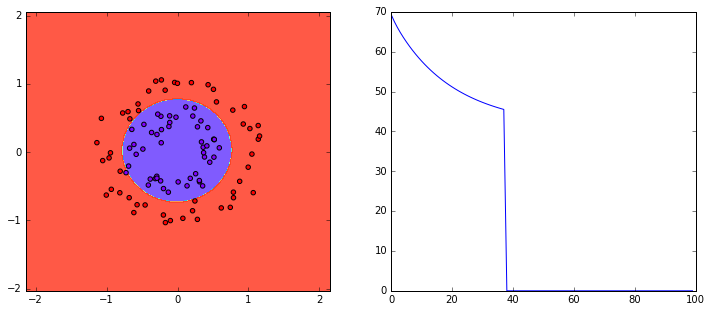

KeyboardInterrupt: 

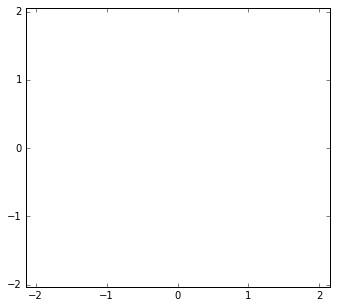

In [814]:
from IPython import display

def classify(X, w):
    return np.sign(1.0 / (1.0 + np.exp(-X.dot(w))) - 0.5)

func = lambda w: logistic(w, X, y)
grad = lambda w: logistic_grad(w, X, y)

for X, y in datasets:
    X, y = expand(X), -2*(y-0.5)
    a = viz_opt(func, grad, X, y) 

### Шаг 6 Сдать ДЗ

In [807]:
X = np.array([
    [ 0.11276959,  0.44971499,  0.9923867 ,  0.89212961],
    [ 0.82695301,  0.30505746,  0.40539034,  0.68335903],
    [ 0.98938714,  0.34498564,  0.36259562,  0.46714136],
    [ 0.46335495,  0.62208345,  0.95386954,  0.41550278],
    [ 0.91471692,  0.69649708,  0.82290076,  0.86441013]])

w = np.array([ 0.45920206,  0.24257981,  0.96715112,  0.21759684])
y = np.array([-1., -1., -1., -1.,  1.])

In [808]:
# Заполните форму https://goo.gl/forms/nRSQuIk8olbmVRIi1 

print('значение функции потерь %.2f'   % logistic(w, X, y))
print('значение суммы градиентов %.2f' % logistic_grad(w, X, y).sum())

значение функции потерь 6.58
значение суммы градиентов 8.41
